## Classification Demo - Naive Bayes

## Binary classification`

- Predict whether patient will suffer from heart disease

In [1]:
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

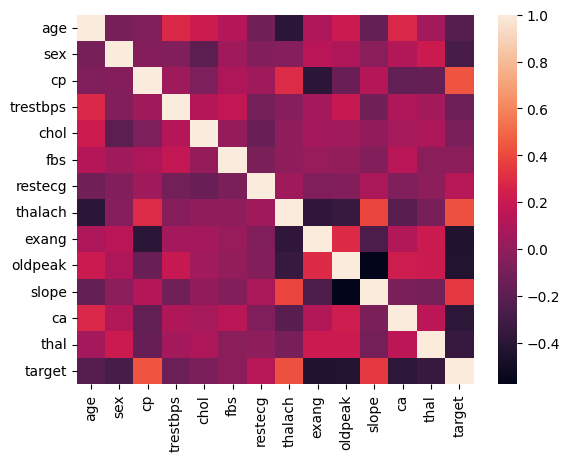

In [10]:
sns.heatmap(df.corr())

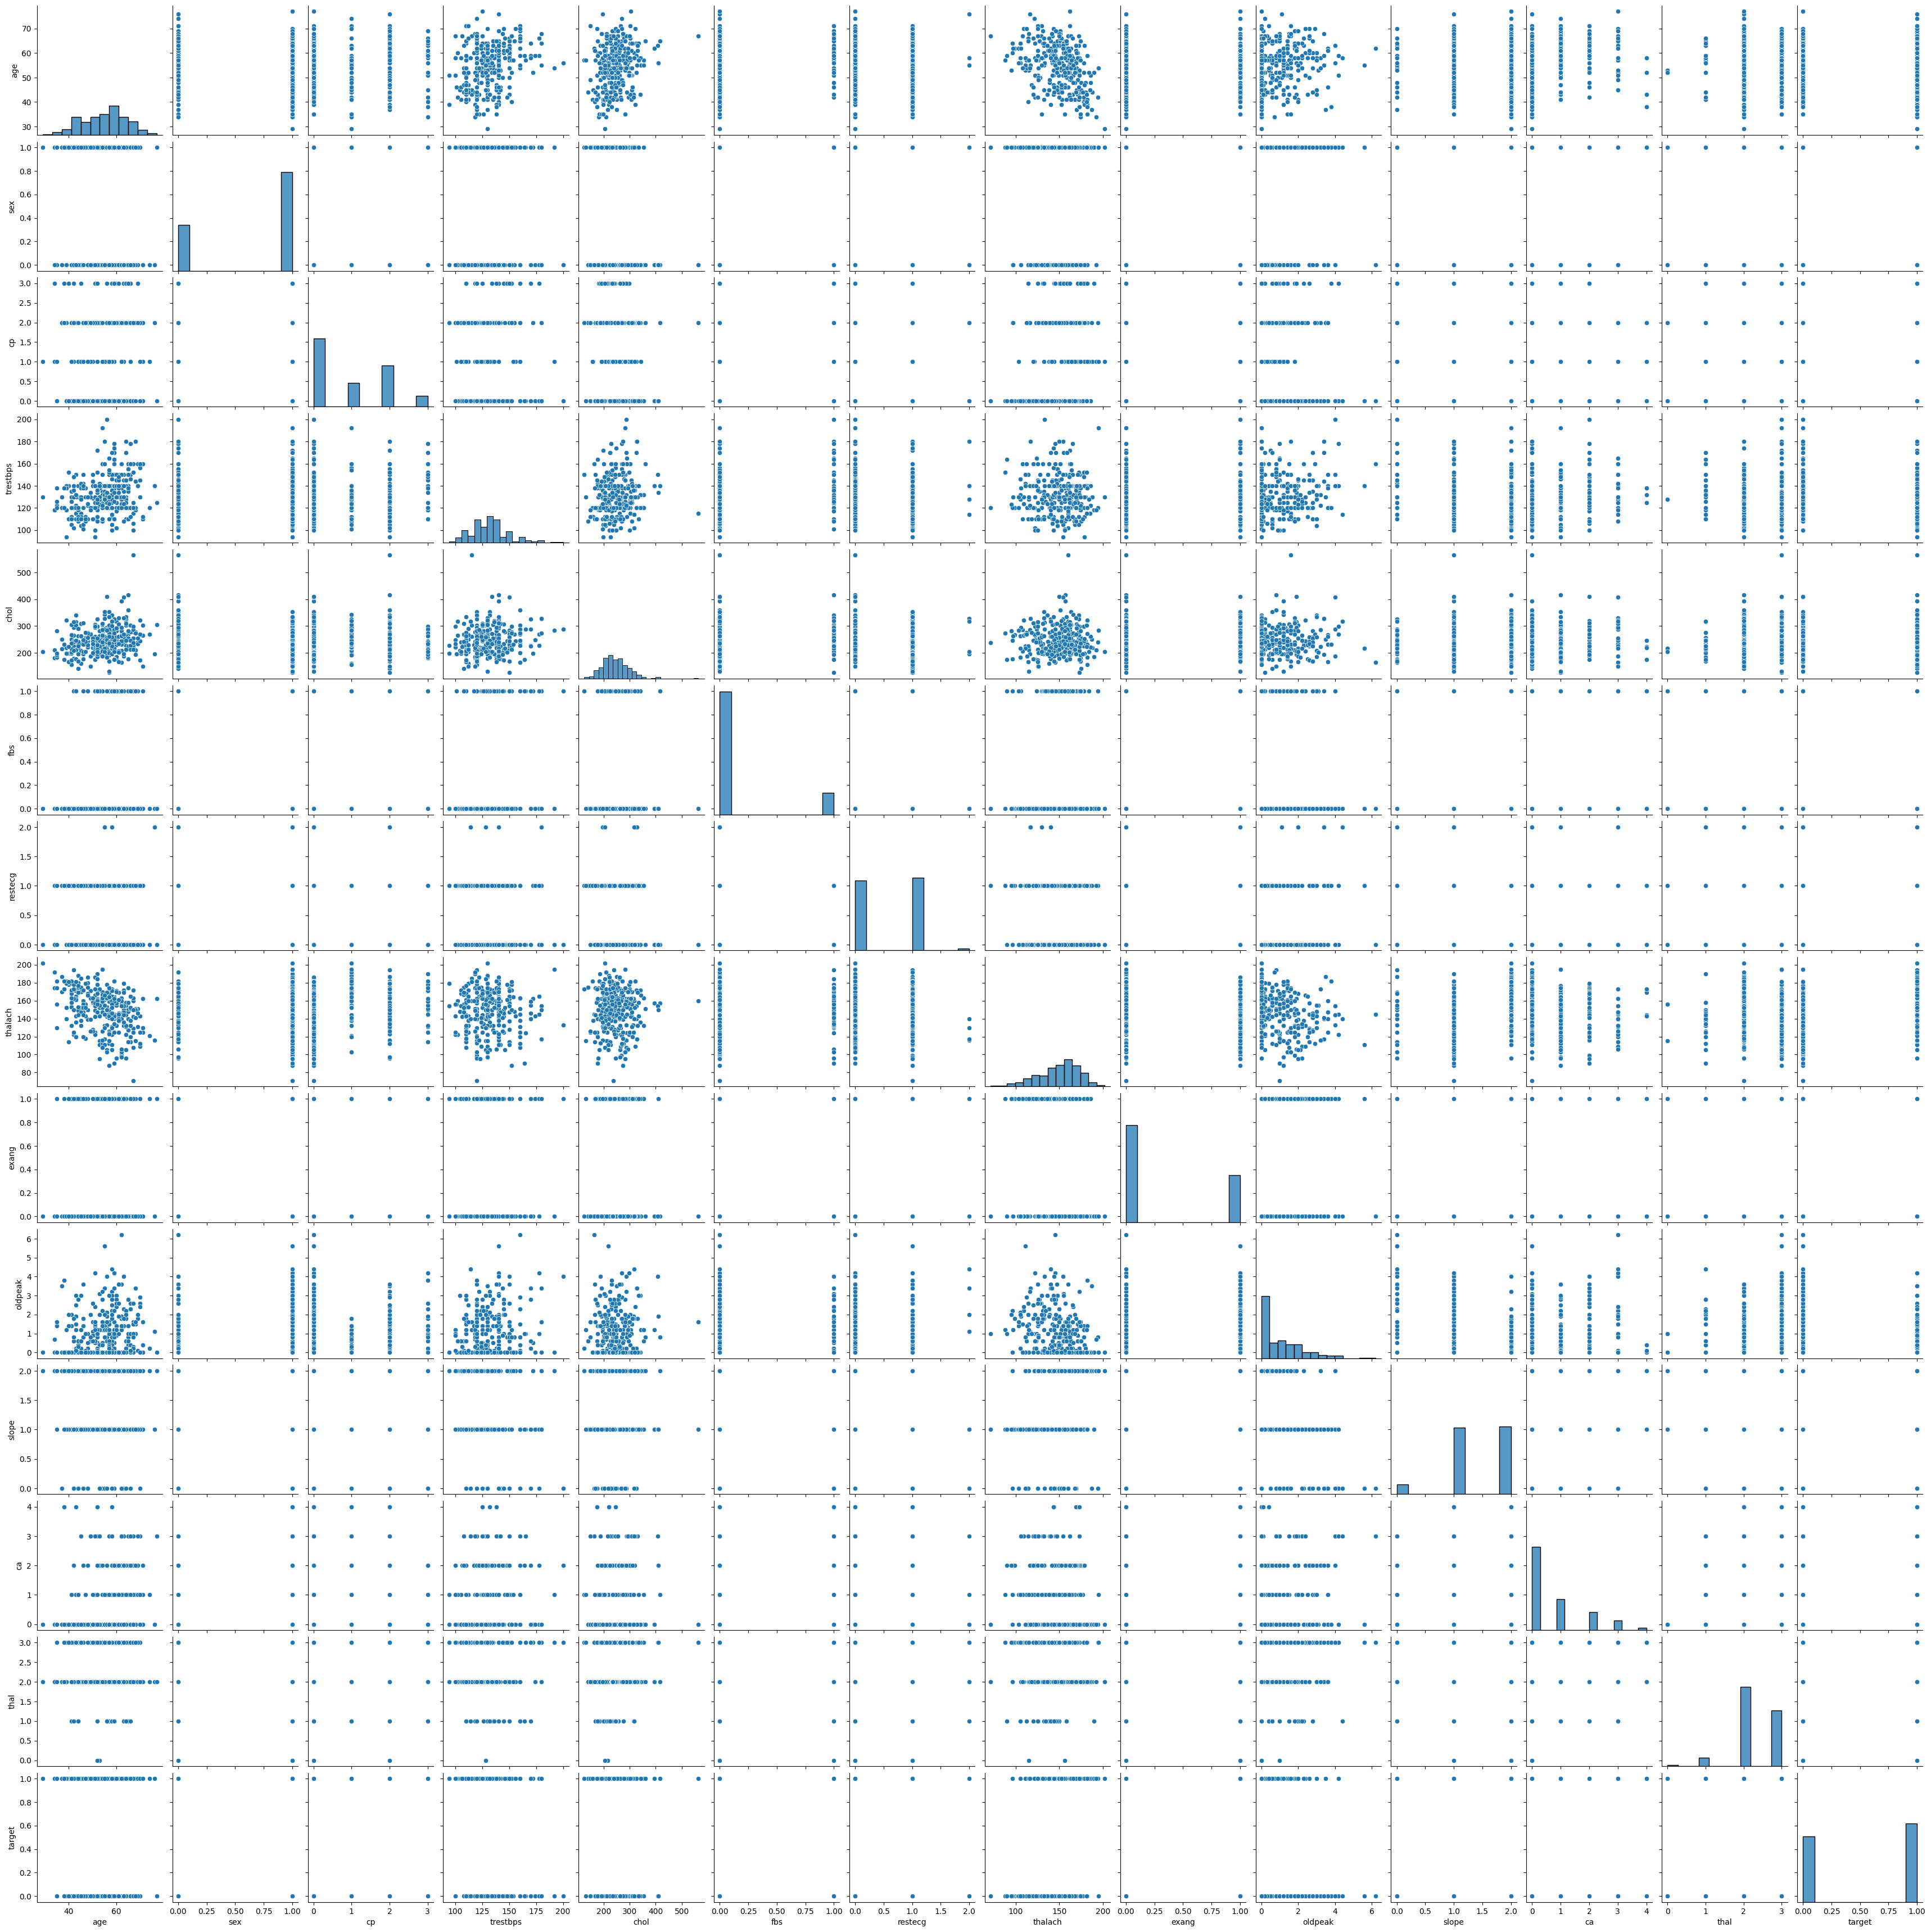

In [33]:
sns.pairplot(df)

In [11]:
df.drop(["trestbps","chol","fbs","restecg"],axis=1,inplace=True)

In [12]:
df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [13]:
x = df.drop("target",axis = 1)
y = df["target"]

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123456)

### model build 
## logistic regression

In [17]:
from sklearn.naive_bayes import GaussianNB

#if you get warning take max_iter = 1000
model = GaussianNB()

model.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [20]:
# check which probability is higher [0.03610961, 0.96389039] from this and gives output as 1 or 0, here it gives 1s
model.predict_proba(x_test)

array([[7.16557365e-04, 9.99283443e-01],
       [1.30225006e-02, 9.86977499e-01],
       [9.99990700e-01, 9.29997533e-06],
       [4.73011329e-01, 5.26988671e-01],
       [6.10956551e-02, 9.38904345e-01],
       [3.93841624e-01, 6.06158376e-01],
       [8.88714393e-01, 1.11285607e-01],
       [6.02276163e-03, 9.93977238e-01],
       [3.29564379e-03, 9.96704356e-01],
       [1.03257801e-02, 9.89674220e-01],
       [9.84566083e-01, 1.54339175e-02],
       [1.31060509e-03, 9.98689395e-01],
       [3.92216611e-02, 9.60778339e-01],
       [7.49192304e-01, 2.50807696e-01],
       [9.26740750e-01, 7.32592499e-02],
       [3.41741471e-03, 9.96582585e-01],
       [3.17793683e-01, 6.82206317e-01],
       [7.02698277e-03, 9.92973017e-01],
       [7.56934209e-02, 9.24306579e-01],
       [1.46348783e-03, 9.98536512e-01],
       [9.44864833e-01, 5.51351672e-02],
       [9.98672288e-01, 1.32771184e-03],
       [7.48188620e-01, 2.51811380e-01],
       [1.14383999e-03, 9.98856160e-01],
       [2.140713

In [21]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  5],
       [ 2, 35]])

In [22]:
tn,fp,fn,tp = cm.ravel()
print(f"tn : {tn},fp : {fp},fn : {fn},tp : {tp}")

tn : 19,fp : 5,fn : 2,tp : 35


In [23]:
accuracy = (tn+tp)/(tn+tp+fn+fp)
print(f"Accuracy : {accuracy*100:.2f}%")

Accuracy : 88.52%


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy*100:.2f}%")

Accuracy : 88.52%


In [25]:
# we pass here x_test and y_test
testing_accuracy = model.score(x_test,y_test)
print(f"testing_accuracy : {testing_accuracy*100:.2f}%")

testing_accuracy : 88.52%


In [26]:
training_accuracy = model.score(x_train,y_train)
print(f"training_accuracy : {training_accuracy*100:.2f}%")

training_accuracy : 81.82%


In [27]:
# overfitted model = very good training accuracy and lower testing accuracy,
# underfitted model = low training accuracy
# moderate training and testing accuracy = normally fitted model

In [28]:
positive_precision = tp/(tp+fp)
print(f"positive_precision : {positive_precision*100:.2f}%")

negative_precision = tn/(tn+fn)
print(f"negative_precision : {negative_precision*100:.2f}%")

positive_precision : 87.50%
negative_precision : 90.48%


In [29]:
from sklearn.metrics import precision_score

precison = precision_score(y_test,y_pred)
print(f"precison : {precison*100:.2f}%")

precison : 87.50%


In [30]:
recall_positive = tp/(tp+fn)
print(f"recall_positive : {recall_positive*100:.2f}%")

recall_negative = tn/(tn+fp)
print(f"recall_negative : {recall_negative*100:.2f}%")

recall_positive : 94.59%
recall_negative : 79.17%


In [31]:
from sklearn.metrics import recall_score

recall = recall_score(y_test,y_pred)
print(f"recall : {recall*100:.2f}%")

recall : 94.59%


In [32]:
f1_positive = 2 * ((positive_precision*recall_positive)/(positive_precision+recall_positive))
print(f"f1_positive : {f1_positive*100:.2f}%")

f1_negative = 2 * ((negative_precision*recall_negative)/(negative_precision+recall_negative))
print(f"f1_negative : {f1_negative*100:.2f}%")

f1_positive : 90.91%
f1_negative : 84.44%


In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_pred)
print(f"f1 : {f1*100:.2f}%")

f1 : 90.91%


In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.88      0.95      0.91        37

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



### output visualization

In [1]:
# any two independent variables are plotted on x and y 
# dependent variable is used to classify the records using different colors

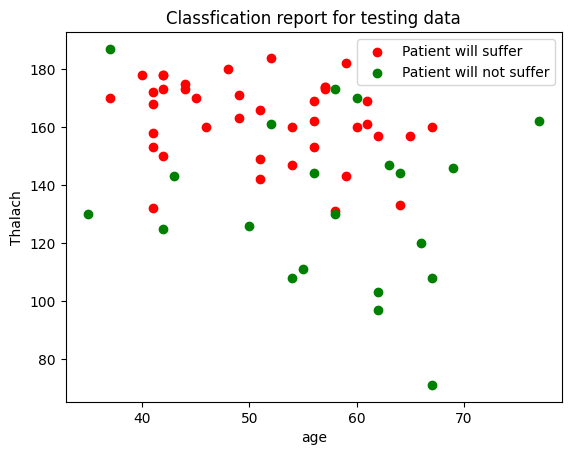

In [36]:
# plot age and thalach on x and y axes
plt.scatter(x_test['age'][y_pred == 1],x_test['thalach'][y_pred == 1],color="red",label = "Patient will suffer")
plt.scatter(x_test['age'][y_pred == 0],x_test['thalach'][y_pred == 0],color="green",label = "Patient will not suffer")
plt.xlabel("age")
plt.ylabel("Thalach")
plt.title("Classfication report for testing data")
plt.legend()

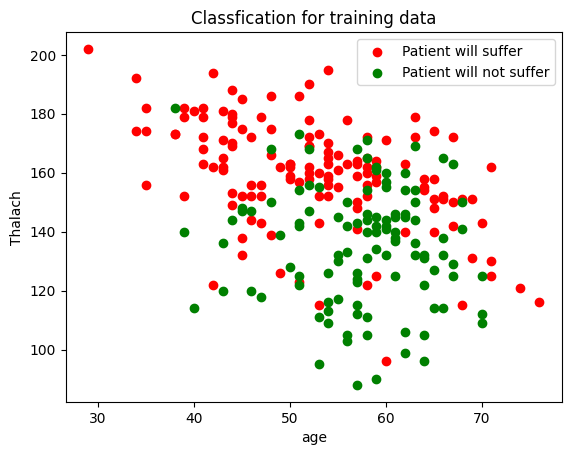

In [37]:
# plot age and thalach on x and y axes

y_pred_trainning = model.predict(x_train)

plt.scatter(x_train['age'][y_pred_trainning == 1],x_train['thalach'][y_pred_trainning == 1],color="red",label = "Patient will suffer")
plt.scatter(x_train['age'][y_pred_trainning == 0],x_train['thalach'][y_pred_trainning == 0],color="green",label = "Patient will not suffer")
plt.xlabel("age")
plt.ylabel("Thalach")
plt.title("Classfication for training data")
plt.legend()